## 1) Import and explore MNIST data

In [1]:
# ------------------------------------------
# import matplotlib.pyplot as plt
# ------------------------------------------
import nut as nut
from sklearn.datasets import fetch_openml
import datetime

print(datetime.datetime.now().strftime("%H:%M:%S"))

# ------------------------------------------
# Import MNIST data from openml.org
# ------------------------------------------
mnist = fetch_openml('mnist_784')

print(datetime.datetime.now().strftime("%H:%M:%S"))


# ------------------------------------------
# # Split data into features (X) and labels (y)
# ------------------------------------------
X, y = mnist["data"], mnist["target"]


10:27:01


/Users/ZongyuWu/miniforge3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


10:27:42


In [3]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


The above describe shows that the max value of many pixels are 0 which means they are black. Others have value vary from 0 to 255.

### Add noise to data

In [46]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# -----------------------------------
#  Add Gaussian noise to the images
# -----------------------------------
noisy_X_normal = np.clip(mnist['data'] + 100 * np.random.normal(size=X.shape), 0, 1)

# -----------------------------------
#  Add Uniform noise to the images
# -----------------------------------
noisy_X_uniform = np.clip(X + 100 * np.random.uniform(-1, 1, size=X.shape), 0, 1)


# Convert feature data to DataFrame object
df_original = pd.DataFrame(data=mnist['data'], columns=mnist['feature_names'])
df_noisy_normal = pd.DataFrame(noisy_X_normal, columns=mnist['feature_names'])
df_noisy_uniform = pd.DataFrame(noisy_X_uniform, columns=mnist['feature_names'])

# Convert label data to NumPy array
labels_original = np.array(mnist['target'])

# ---------------------------------------------------------------------------------------
# reshape method with the argument -1 indicates that the size of the first dimension
# be automatically determined based on the size of the other dimensions.
# Reshape feature data into 28x28 images
images_original = df_original.to_numpy().reshape(-1, 28, 28)
images_noisy_normal = df_noisy_normal.to_numpy().reshape(-1, 28, 28)
images_noisy_uniform = df_noisy_uniform.to_numpy().reshape(-1, 28, 28)

### Visualize original data

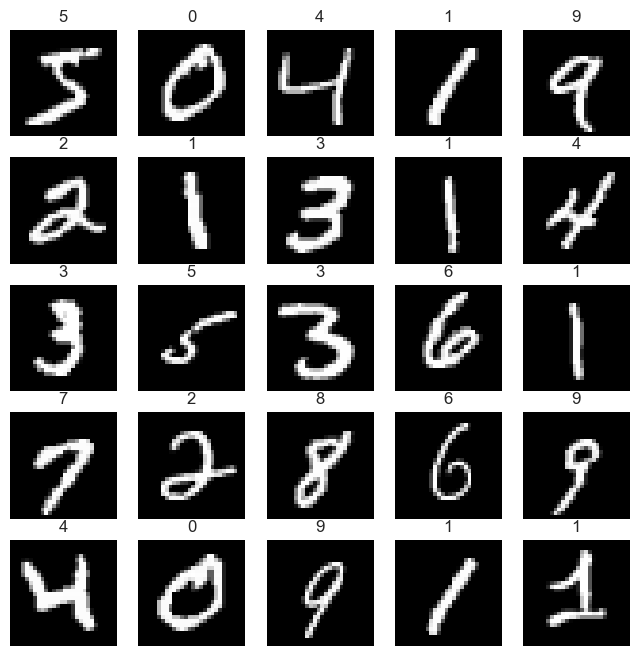

In [11]:
# Visualize first 25 images
fig, axs = plt.subplots(5, 5, figsize=(8, 8))
for i in range(5):
    for j in range(5):
        axs[i, j].imshow(images_original[i * 5 + j], cmap="gray")
#         axs[i, j].imshow(images_noisy_normal[i * 5 + j], cmap="gray")
#         axs[i, j].imshow(images_noisy_uniform[i * 5 + j], cmap="gray")
        axs[i, j].axis("off")
        axs[i, j].set_title(labels_original[i * 5 + j])
plt.show()

### Visualize gaussian noise data

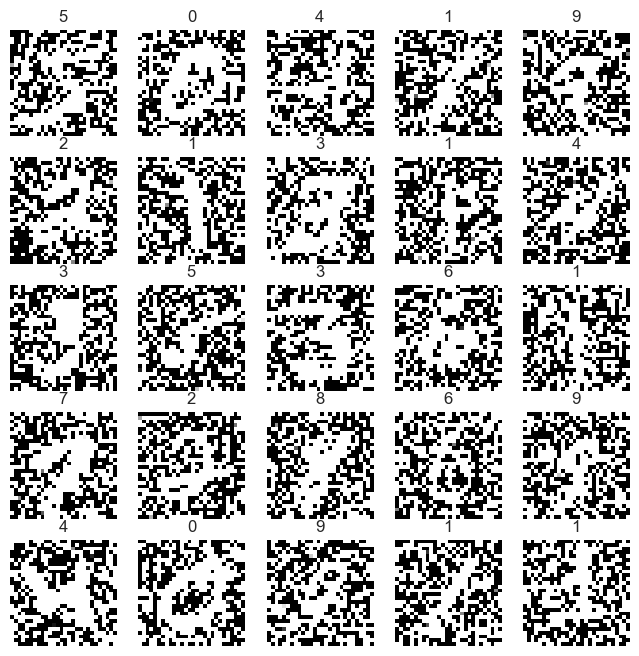

In [12]:
fig, axs = plt.subplots(5, 5, figsize=(8, 8))
for i in range(5):
    for j in range(5):
        # axs[i, j].imshow(images_original[i * 5 + j], cmap="gray")
        axs[i, j].imshow(images_noisy_normal[i * 5 + j], cmap="gray")
#         axs[i, j].imshow(images_noisy_uniform[i * 5 + j], cmap="gray")
        axs[i, j].axis("off")
        axs[i, j].set_title(labels_original[i * 5 + j])
plt.show()

### Visualize uniform noise data

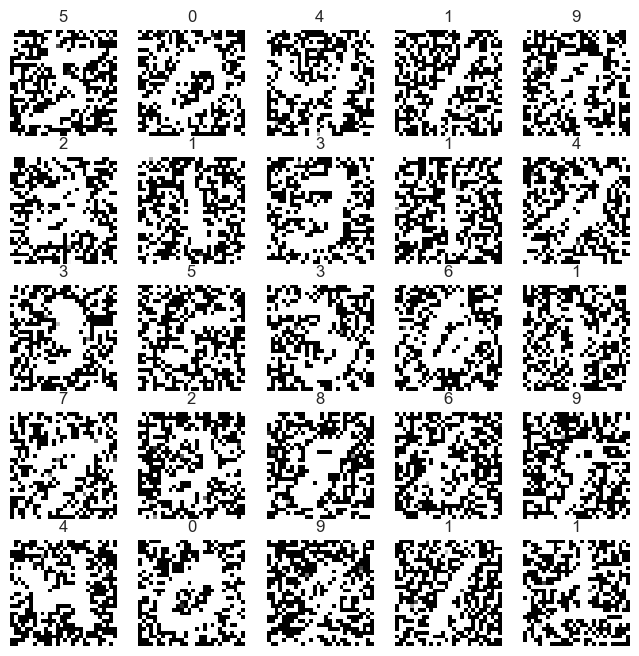

In [13]:
fig, axs = plt.subplots(5, 5, figsize=(8, 8))
for i in range(5):
    for j in range(5):
        # axs[i, j].imshow(images_original[i * 5 + j], cmap="gray")
#         axs[i, j].imshow(images_noisy_normal[i * 5 + j], cmap="gray")
        axs[i, j].imshow(images_noisy_uniform[i * 5 + j], cmap="gray")
        axs[i, j].axis("off")
        axs[i, j].set_title(labels_original[i * 5 + j])
plt.show()

## 2) Standardize the data

Will use the uniform noise data as noise data.
Standardize by dividing by 255.

In [47]:
df_original = df_original / 255
df_noisy_uniform = df_noisy_uniform / 255

Now the data is from 0 to 1.

In [44]:
df_original.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000774,0.000390,0.000183,0.000065,0.000051,0.000007,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023495,0.016691,0.010917,0.006125,0.006093,0.001258,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


## 3) Identify outliers and create their own cluster.

### Detect outlier with three methods on the original data

In [20]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# -----------------------------------------------------------------------------
# Step 3a
# fit the Local Outlier Factor model (based on KNN)
# Notice the contamination parameter to identify a certain proportion of outliers
# -----------------------------------------------------------------------------

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
# predict the labels for each data point (as Outlier or inlier)
y_pred_lof = lof.fit_predict(df_original)

# -----------------------------------------------------------------------------
# Step 3b
# fit the Isolation Forest outlier detection (based on decision trees)
# -----------------------------------------------------------------------------
iforest = IsolationForest(n_estimators=100,  contamination=0.05)
# predict the labels for each data point (as Outlier or inlier)
y_pred_if = iforest.fit_predict(df_original)


# -----------------------------------------------------------------------------
# Step 3c
# fit the robust covariance model (based on Mahalanobis distance)
# -----------------------------------------------------------------------------
rob_cov = EllipticEnvelope(contamination=0.05)
rob_cov.fit(X)

# predict the labels for each data point (as Outlier or inlier)
y_pred_rob = rob_cov.predict(df_original)

# -----------------------------------------------------------------------------
# Adding the newly created columns to the nutrotion table
# -----------------------------------------------------------------------------
outlier = pd.DataFrame()
outlier["y_pred_lof"] = y_pred_lof
outlier["y_pred_if"] = y_pred_if
outlier["y_pred_rob"] = y_pred_rob

# -----------------------------------------------------------------------------
# Converting them to a binary -1, 0.
# Where -1 denotes outlier
# The purpose is to then add these columns and find out which rows were identified as outliers from multiple methods
# -----------------------------------------------------------------------------
outlier["y_pred_lof_2"] = np.where(outlier["y_pred_lof"]<0, -1, 0)
outlier["y_pred_if_2"] = np.where(outlier["y_pred_if"]<0, -1, 0)
outlier["y_pred_rob_2"] = np.where(outlier["y_pred_rob"]<0, -1, 0)


/Users/ZongyuWu/miniforge3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/Users/ZongyuWu/miniforge3/lib/python3.10/site-packages/sklearn/covariance/_robust_covariance.py:745: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


### Show rows detected as outlier

In [21]:
outlier["all_out"] = outlier.loc[:,["y_pred_if_2","y_pred_rob_2","y_pred_lof_2"]].sum(axis = 1)
print(outlier["all_out"].value_counts())

# -----------------------------------------------------------------------------
# List of food items identified as outliers based by at least two methods
# -----------------------------------------------------------------------------
outlier[outlier["all_out"]<-1]

 0    63185
-1     6630
-2      185
Name: all_out, dtype: int64


,y_pred_lof,y_pred_if,y_pred_rob,y_pred_lof_2,y_pred_if_2,y_pred_rob_2,all_out
28,-1,-1,1,-1,-1,0,-2
440,-1,-1,1,-1,-1,0,-2
1480,-1,-1,1,-1,-1,0,-2
3106,-1,-1,1,-1,-1,0,-2
3362,-1,-1,1,-1,-1,0,-2
...,...,...,...,...,...,...,...
68374,-1,-1,1,-1,-1,0,-2
68553,-1,-1,1,-1,-1,0,-2
68561,-1,-1,1,-1,-1,0,-2
69596,-1,-1,1,-1,-1,0,-2


## 4) Filter out outliers and perform clustering using the above techniques.

### Filter out outliers

In [48]:
df_original = df_original[outlier['all_out'] >= -1]
df_noisy_uniform = df_noisy_uniform[outlier['all_out'] >= -1]
labels_original = labels_original[outlier['all_out'] >= -1]

### Cluster on original data

### K Means

In [51]:
from sklearn.cluster import KMeans

# ----------------------------------------
# Create KMeans object with # clusters of your choice
# ----------------------------------------
kmeans = KMeans(n_clusters=10, random_state=100)

# ----------------------------------------
# Fit KMeans model to the data
# ----------------------------------------
kmeans.fit(df_original)

# ----------------------------------------
# Get the cluster labels and centroids
# ----------------------------------------
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


/Users/ZongyuWu/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Draw 10 image from each cluster

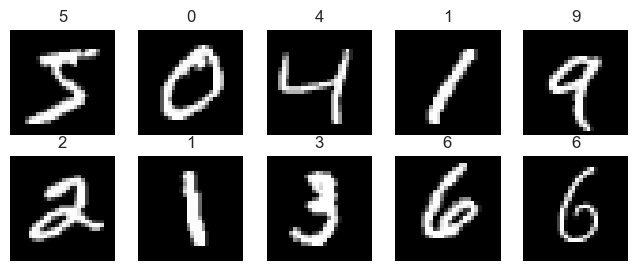

In [60]:
# ---------------------------------------------------------------------------------------
# reshape method with the argument -1 indicates that the size of the first dimension
# be automatically determined based on the size of the other dimensions.
# Reshape feature data into 28x28 images
# Then plot the centroids of each cluster
fig, axs = plt.subplots(2, 5, figsize=(8, 3))
shown = set()
i = 0
while len(shown) < 10 and i < labels.shape[0]:
    if labels[i] in shown:
        i += 1
        continue
    images = np.array(df_original.iloc[i, :]).reshape(28, 28)
    row, col = len(shown) // 5, len(shown) % 5
    axs[row, col].imshow(images, cmap="gray")
    axs[row, col].axis("off")
    axs[row, col].set_title(labels_original[i])
    shown.add(labels[i])
    i += 1

plt.show()

### Mini Batch K Means

In [65]:
from sklearn.cluster import MiniBatchKMeans

# -----------------------------------------------------------------------------
# Create MiniBatchKMeans object with 3 clusters and a batch size of 10
# -----------------------------------------------------------------------------
mbkmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=100)

# -----------------------------------------------------------------------------
# Fit MiniBatchKMeans model to the data
# -----------------------------------------------------------------------------
mbkmeans.fit(df_original)

# -----------------------------------------------------------------------------
# Get the cluster labels and centroids
# -----------------------------------------------------------------------------
labels = mbkmeans.labels_
centroids = mbkmeans.cluster_centers_

/Users/ZongyuWu/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Draw 10 image from each cluster

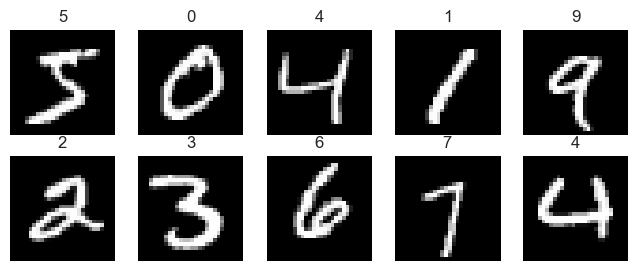

In [66]:
 # ---------------------------------------------------------------------------------------
# reshape method with the argument -1 indicates that the size of the first dimension
# be automatically determined based on the size of the other dimensions.
# Reshape feature data into 28x28 images
# Then plot the centroids of each cluster
fig, axs = plt.subplots(2, 5, figsize=(8, 3))
shown = set()
i = 0
while len(shown) < 10 and i < labels.shape[0]:
    if labels[i] in shown:
        i += 1
        continue
    images = np.array(df_original.iloc[i, :]).reshape(28, 28)
    row, col = len(shown) // 5, len(shown) % 5
    axs[row, col].imshow(images, cmap="gray")
    axs[row, col].axis("off")
    axs[row, col].set_title(labels_original[i])
    shown.add(labels[i])
    i += 1

plt.show()

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# -----------------------------------
# Create the DBSCAN model
# -----------------------------------
dbscan = DBSCAN(eps=2, min_samples=15)

# Fit the model to the data
dbscan.fit(df_original)

# Get the labels and number of clusters
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

### Draw 10 images. There's only one cluster.

There are 1 clusters.


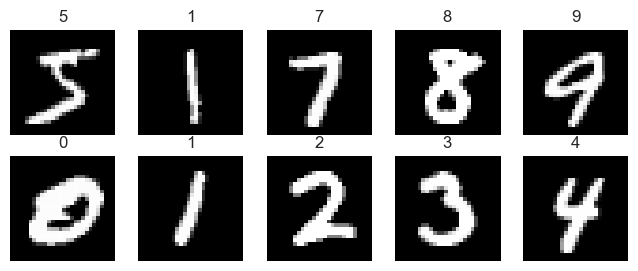

In [81]:
 # ---------------------------------------------------------------------------------------
# reshape method with the argument -1 indicates that the size of the first dimension
# be automatically determined based on the size of the other dimensions.
# Reshape feature data into 28x28 images
# Then plot the centroids of each cluster
fig, axs = plt.subplots(2, 5, figsize=(8, 3))
shown = set()
i = 0
count = 0
while len(shown) < 10 and i < labels.shape[0]:
    if (labels[i] in shown and i < labels.shape[0] - 10) or count >= 10:
        i += 1
        continue
    images = np.array(df_original.iloc[i, :]).reshape(28, 28)
    row, col = count // 5, count % 5
    axs[row, col].imshow(images, cmap="gray")
    axs[row, col].axis("off")
    axs[row, col].set_title(labels_original[i])
    shown.add(labels[i])
    i += 1
    count += 1

print(f'There are {n_clusters} clusters.')
plt.show()

### HDBSCAN

In [63]:
import hdbscan

# -------------------------
# Create the HDBSCAN model
# -------------------------
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5)

# -------------------------
# Fit the model to the data
# -------------------------
hdbscan_model.fit(df_original)

# --------------------------------------------------
# Get the labels and number of clusters
# --------------------------------------------------
labels = hdbscan_model.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

### Draw 10 images. There are many clusters but only draw 10 clusters.

There are 106 clusters.


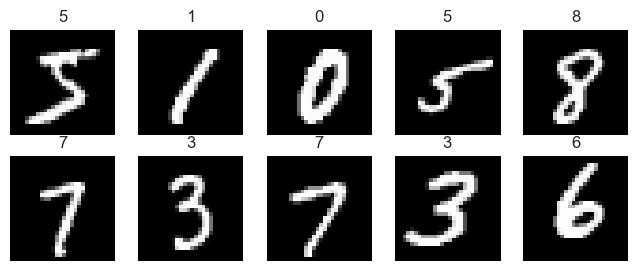

In [64]:
 # ---------------------------------------------------------------------------------------
# reshape method with the argument -1 indicates that the size of the first dimension
# be automatically determined based on the size of the other dimensions.
# Reshape feature data into 28x28 images
# Then plot the centroids of each cluster
fig, axs = plt.subplots(2, 5, figsize=(8, 3))
shown = set()
i = 0
while len(shown) < 10 and i < labels.shape[0]:
    if labels[i] in shown and i < labels.shape[0] - 10:
        i += 1
        continue
    images = np.array(df_original.iloc[i, :]).reshape(28, 28)
    row, col = len(shown) // 5, len(shown) % 5
    axs[row, col].imshow(images, cmap="gray")
    axs[row, col].axis("off")
    axs[row, col].set_title(labels_original[i])
    shown.add(labels[i])
    i += 1

print(f'There are {n_clusters} clusters.')
plt.show()

### Uniform Noise


### K Means

In [69]:
from sklearn.cluster import KMeans

# ----------------------------------------
# Create KMeans object with # clusters of your choice
# ----------------------------------------
kmeans = KMeans(n_clusters=10, random_state=100)

# ----------------------------------------
# Fit KMeans model to the data
# ----------------------------------------
kmeans.fit(df_original)

# ----------------------------------------
# Get the cluster labels and centroids
# ----------------------------------------
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


/Users/ZongyuWu/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Draw 10 image from each cluster

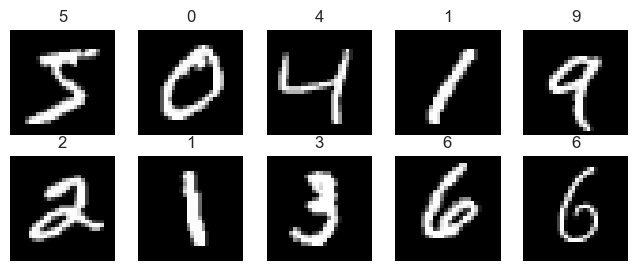

In [70]:
# ---------------------------------------------------------------------------------------
# reshape method with the argument -1 indicates that the size of the first dimension
# be automatically determined based on the size of the other dimensions.
# Reshape feature data into 28x28 images
# Then plot the centroids of each cluster
fig, axs = plt.subplots(2, 5, figsize=(8, 3))
shown = set()
i = 0
while len(shown) < 10 and i < labels.shape[0]:
    if labels[i] in shown:
        i += 1
        continue
    images = np.array(df_original.iloc[i, :]).reshape(28, 28)
    row, col = len(shown) // 5, len(shown) % 5
    axs[row, col].imshow(images, cmap="gray")
    axs[row, col].axis("off")
    axs[row, col].set_title(labels_original[i])
    shown.add(labels[i])
    i += 1

plt.show()

### Mini Batch K Means

In [71]:
from sklearn.cluster import MiniBatchKMeans

# -----------------------------------------------------------------------------
# Create MiniBatchKMeans object with 3 clusters and a batch size of 10
# -----------------------------------------------------------------------------
mbkmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=100)

# -----------------------------------------------------------------------------
# Fit MiniBatchKMeans model to the data
# -----------------------------------------------------------------------------
mbkmeans.fit(df_original)

# -----------------------------------------------------------------------------
# Get the cluster labels and centroids
# -----------------------------------------------------------------------------
labels = mbkmeans.labels_
centroids = mbkmeans.cluster_centers_

/Users/ZongyuWu/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Draw 10 image from each cluster

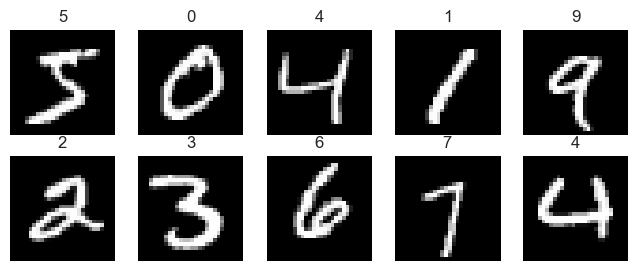

In [72]:
 # ---------------------------------------------------------------------------------------
# reshape method with the argument -1 indicates that the size of the first dimension
# be automatically determined based on the size of the other dimensions.
# Reshape feature data into 28x28 images
# Then plot the centroids of each cluster
fig, axs = plt.subplots(2, 5, figsize=(8, 3))
shown = set()
i = 0
while len(shown) < 10 and i < labels.shape[0]:
    if labels[i] in shown:
        i += 1
        continue
    images = np.array(df_original.iloc[i, :]).reshape(28, 28)
    row, col = len(shown) // 5, len(shown) % 5
    axs[row, col].imshow(images, cmap="gray")
    axs[row, col].axis("off")
    axs[row, col].set_title(labels_original[i])
    shown.add(labels[i])
    i += 1

plt.show()

### DBSCAN

In [83]:
from sklearn.cluster import DBSCAN

# -----------------------------------
# Create the DBSCAN model
# -----------------------------------
dbscan = DBSCAN(eps=2, min_samples=15)

# Fit the model to the data
dbscan.fit(df_original)

# Get the labels and number of clusters
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

### Draw 10 images. There's only one cluster.

There are 1 clusters.


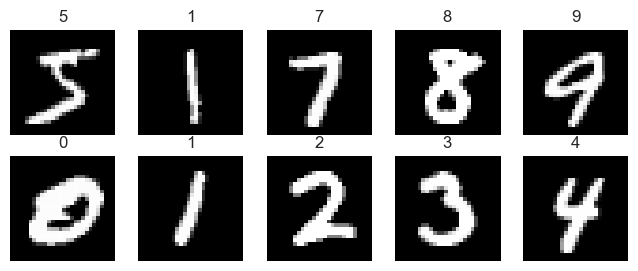

In [84]:
 # ---------------------------------------------------------------------------------------
# reshape method with the argument -1 indicates that the size of the first dimension
# be automatically determined based on the size of the other dimensions.
# Reshape feature data into 28x28 images
# Then plot the centroids of each cluster
fig, axs = plt.subplots(2, 5, figsize=(8, 3))
shown = set()
i = 0
count = 0
while len(shown) < 10 and i < labels.shape[0]:
    if (labels[i] in shown and i < labels.shape[0] - 10) or count >= 10:
        i += 1
        continue
    images = np.array(df_original.iloc[i, :]).reshape(28, 28)
    row, col = count // 5, count % 5
    axs[row, col].imshow(images, cmap="gray")
    axs[row, col].axis("off")
    axs[row, col].set_title(labels_original[i])
    shown.add(labels[i])
    i += 1
    count += 1

print(f'There are {n_clusters} clusters.')
plt.show()

### HDBSCAN

In [85]:
import hdbscan

# -------------------------
# Create the HDBSCAN model
# -------------------------
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5)

# -------------------------
# Fit the model to the data
# -------------------------
hdbscan_model.fit(df_original)

# --------------------------------------------------
# Get the labels and number of clusters
# --------------------------------------------------
labels = hdbscan_model.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

### Draw 10 images. There are many clusters but only draw 10 clusters.

There are 106 clusters.


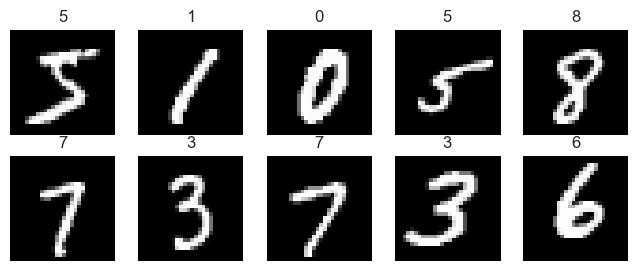

In [86]:
 # ---------------------------------------------------------------------------------------
# reshape method with the argument -1 indicates that the size of the first dimension
# be automatically determined based on the size of the other dimensions.
# Reshape feature data into 28x28 images
# Then plot the centroids of each cluster
fig, axs = plt.subplots(2, 5, figsize=(8, 3))
shown = set()
i = 0
while len(shown) < 10 and i < labels.shape[0]:
    if labels[i] in shown and i < labels.shape[0] - 10:
        i += 1
        continue
    images = np.array(df_original.iloc[i, :]).reshape(28, 28)
    row, col = len(shown) // 5, len(shown) % 5
    axs[row, col].imshow(images, cmap="gray")
    axs[row, col].axis("off")
    axs[row, col].set_title(labels_original[i])
    shown.add(labels[i])
    i += 1

print(f'There are {n_clusters} clusters.')
plt.show()

## Conclusion

K Means and Mini Batch K Means is fast on training. They tend to loss some cluster like 8 or 4. DBSCAN and HDBSCAN are slower than the first two methods. DBSCAN has only one cluster in the end, while HDBSCAN has many clusters in the end.